In [1]:
## standard libraries
import pandas as pd
import numpy as np
## visuals
import seaborn as sns
import matplotlib.pyplot as plt
## ML related


In [14]:
df = sns.load_dataset('tips')

In [22]:
# df.head()

### Aranging columns

In [16]:
df = df[['day','time','size','smoker','sex','total_bill','tip']]

In [20]:
# df.head()

### Moving columns

In [18]:
col = df.pop('sex') 
df.insert(3,'sex',col)

In [23]:
df.head()

,day,time,size,sex,smoker,total_bill,tip
0,Sun,Dinner,2,Female,No,16.99,1.01
1,Sun,Dinner,3,Male,No,10.34,1.66
2,Sun,Dinner,3,Male,No,21.01,3.50
3,Sun,Dinner,2,Male,No,23.68,3.31
4,Sun,Dinner,4,Female,No,24.59,3.61


### Data Info and description

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   day         244 non-null    category
 1   time        244 non-null    category
 2   size        244 non-null    int64   
 3   sex         244 non-null    category
 4   smoker      244 non-null    category
 5   total_bill  244 non-null    float64 
 6   tip         244 non-null    float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00


### Null Check

In [27]:
df.isnull().sum()

day           0
time          0
size          0
sex           0
smoker        0
total_bill    0
tip           0
dtype: int64

### Visualizations

### Data Distribution plots 
### Either use displot / histplot with kde = True

In [48]:
cols = ['size','total_bill','tip']
colors = ['green','blue','red']

				 size




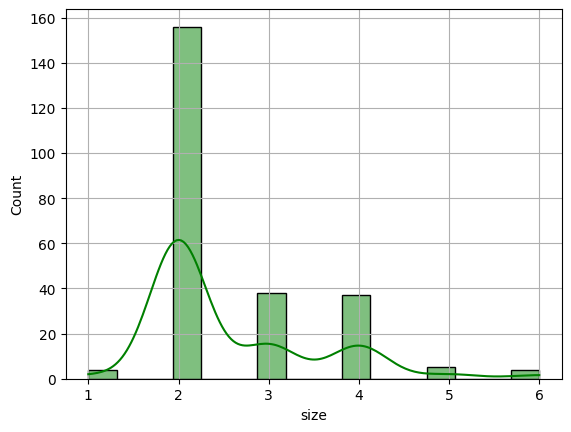



				 total_bill




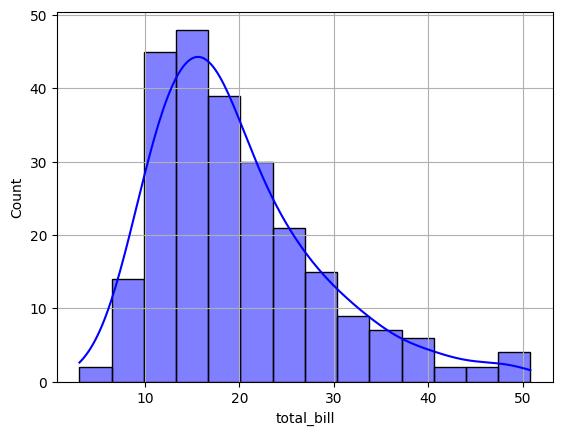



				 tip




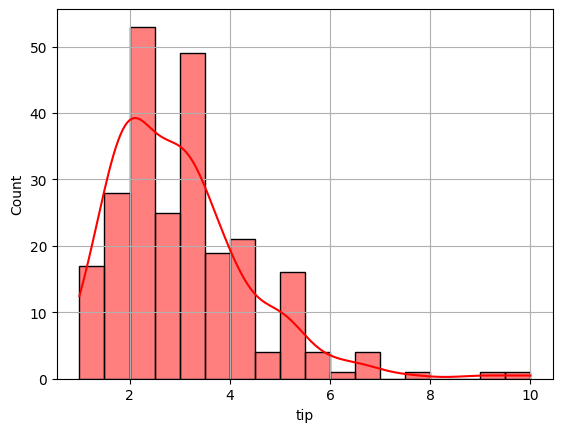

In [60]:
for i,j in zip(cols,colors):
    print('\t\t\t\t',i)
    print('\n')
    sns.histplot(df[i],kde=True,color=j)
    plt.grid()
    plt.xlabel(i,loc='center')
    plt.show()
    print('\n')



# sns.histplot(df['size'],kde=True,color='green')
# plt.grid()
# plt.show()

# ## or 


# sns.displot(df['size'],kde=True)
# plt.show()
    

In [78]:
import warnings
warnings.filterwarnings('ignore')

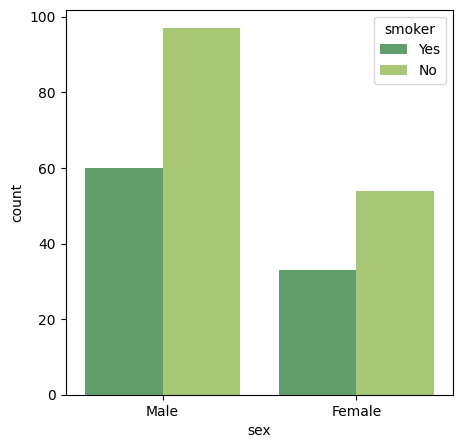

sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
Name: count, dtype: int64


In [80]:
plt.figure(figsize=(5,5))
sns.countplot(x = df['sex'], palette='summer', hue = df['smoker'])
plt.show()
print(df.groupby('sex')['smoker'].value_counts())

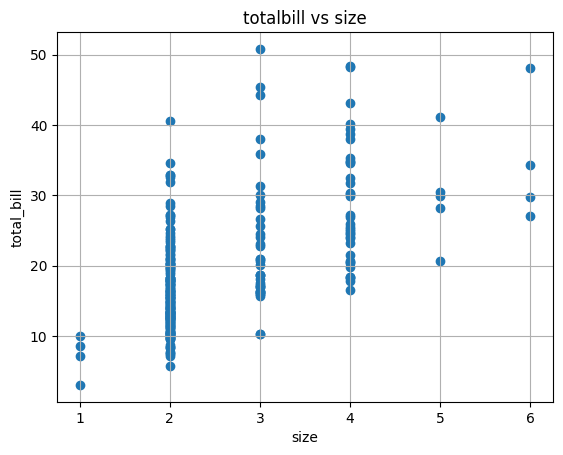

In [86]:
plt.scatter(x = 'size', y = 'total_bill', data=df)
plt.xlabel('size')
plt.ylabel('total_bill')
plt.title('totalbill vs size')
plt.grid()
plt.show()

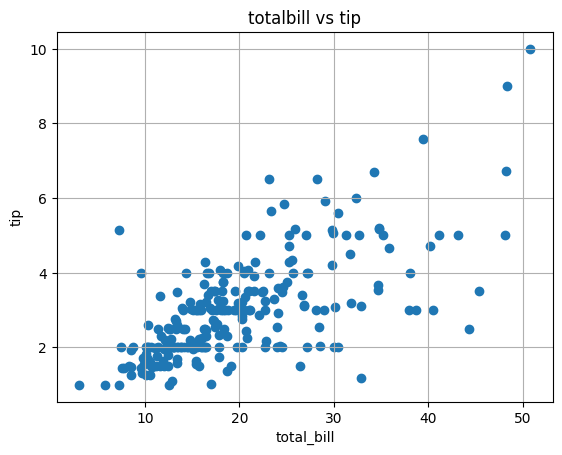

In [87]:
plt.scatter(x = 'total_bill', y = 'tip', data=df,)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('totalbill vs tip')
plt.grid()
plt.show()

In [104]:
sex_avg = pd.DataFrame(df.groupby('sex')['total_bill'].mean())
sex_avg = sex_avg.reset_index()

In [105]:
sex_avg

,sex,total_bill
0,Male,20.744076
1,Female,18.056897


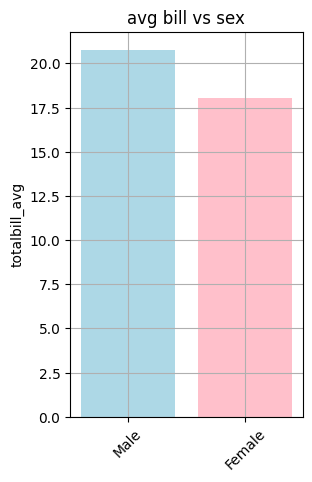

In [123]:
plt.figure(figsize=(3,5))
plt.bar(sex_avg['sex'], sex_avg['total_bill'], color = ['lightblue','pink'])
plt.grid()
plt.ylabel('totalbill_avg')
plt.title('avg bill vs sex')
plt.xticks(rotation = 45)
plt.show()

In [124]:
day_avg = pd.DataFrame(df.groupby('day')['total_bill'].mean())
day_avg = day_avg.reset_index()

In [125]:
day_avg

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


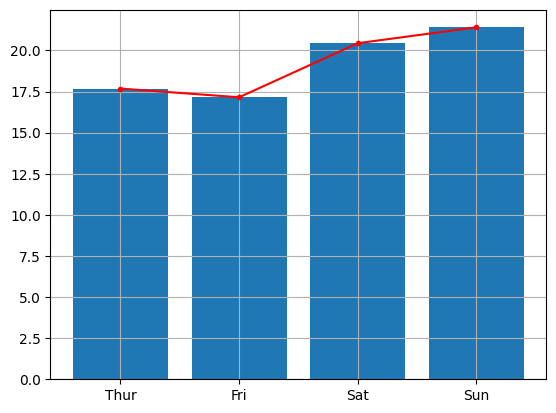

In [136]:
plt.plot(day_avg['day'], day_avg['total_bill'],marker = '.', color ='red')
plt.bar(day_avg['day'], day_avg['total_bill'])
plt.grid()
plt.show()

In [137]:
time_avg = pd.DataFrame(df.groupby('time')['total_bill'].mean())
time_avg = time_avg.reset_index()

In [138]:
time_avg

,time,total_bill
0,Lunch,17.168676
1,Dinner,20.797159


In [139]:
!pip install plotly

In [140]:
import plotly.express as px

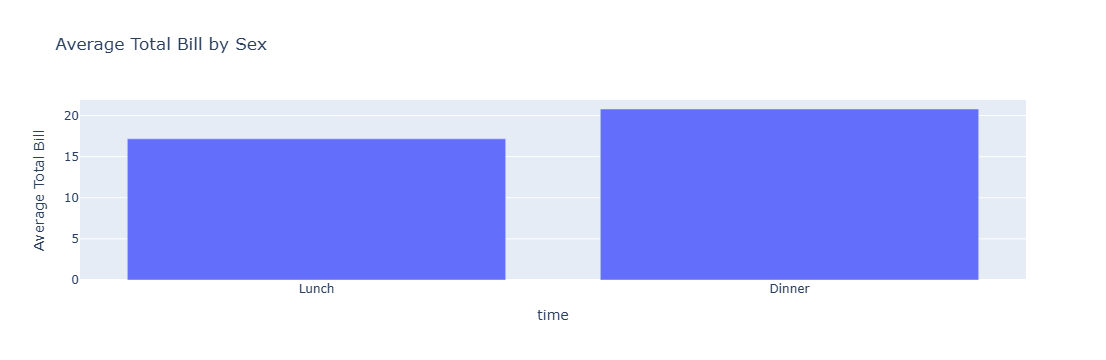

In [144]:
fig = px.bar(time_avg, x='time', y='total_bill', title='Average Total Bill by Sex',
    labels={'sex': 'Sex', 'total_bill': 'Average Total Bill'}
)

fig.show()

In [61]:
df.head()

,day,time,size,sex,smoker,total_bill,tip
0,Sun,Dinner,2,Female,No,16.99,1.01
1,Sun,Dinner,3,Male,No,10.34,1.66
2,Sun,Dinner,3,Male,No,21.01,3.50
3,Sun,Dinner,2,Male,No,23.68,3.31
4,Sun,Dinner,4,Female,No,24.59,3.61


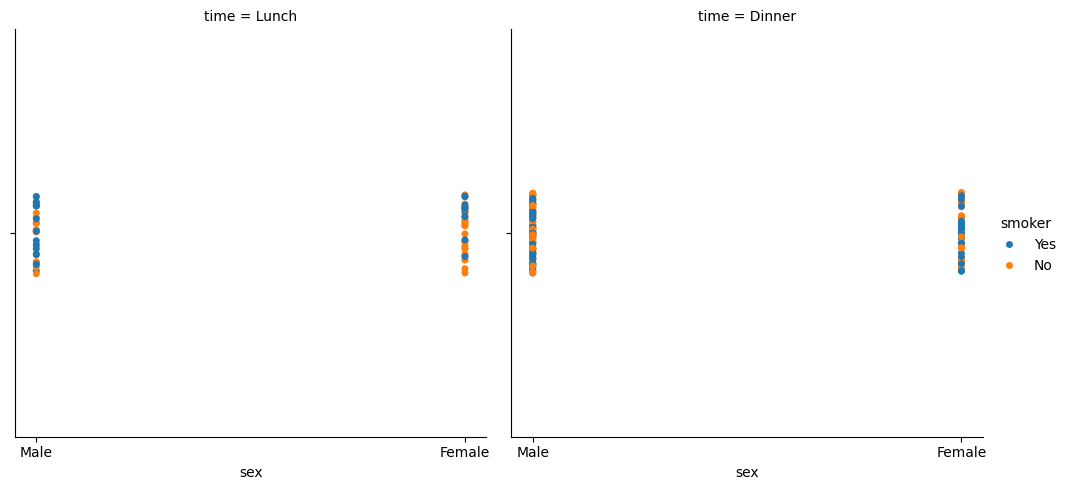

In [153]:
sns.catplot( x= df['sex'] , hue= df['smoker'], col=df['time'])

## Data Analysis

In [158]:
df['tip'].mean()

np.float64(2.99827868852459)

In [162]:
df['tip'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
tip,244.0,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0


<Axes: >

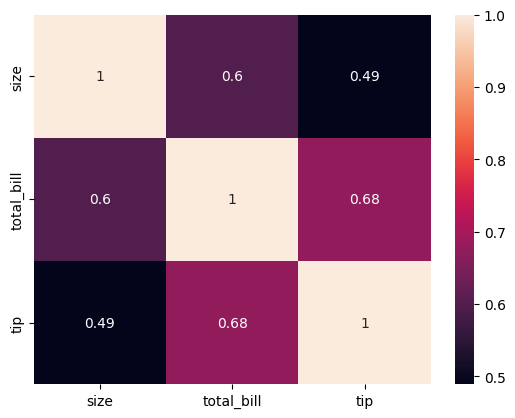

In [166]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [171]:
df['total_bill'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81


In [178]:
tot_bill_grp = []
for i in df['total_bill']:
    if 0 <= i < 10:
        tot_bill_grp.append('0 to 9')
    elif 10 <= i < 20:
        tot_bill_grp.append('10 to 19')
    elif 20 <= i < 30:
        tot_bill_grp.append('20 to 29')
    elif 30 <= i < 40:
        tot_bill_grp.append('30 to 39')
    elif 40 <= i < 50:
        tot_bill_grp.append('40 to 49')
    elif 50 <= i < 60:
        tot_bill_grp.append('50 to 59')
    else:
        tot_bill_grp.append('60+')
    

In [179]:
df['tot_bill_grp'] = tot_bill_grp

In [180]:
df['tot_bill_grp'].value_counts()

tot_bill_grp
10 to 19    130
20 to 29     65
30 to 39     22
0 to 9       17
40 to 49      9
50 to 59      1
Name: count, dtype: int64

In [197]:
df.groupby(['tot_bill_grp'])['tip'].max()

tot_bill_grp
0 to 9       5.15
10 to 19     4.30
20 to 29     6.50
30 to 39     7.58
40 to 49     9.00
50 to 59    10.00
Name: tip, dtype: float64

### Getting the average tip received on the total_bill group

In [194]:
grp_size = pd.DataFrame(df.groupby(['tot_bill_grp','size'])['tip'].mean())
grp_size['unique'] = df.groupby(['tot_bill_grp','size'])['tip'].unique()
grp_size

tip  \
tot_bill_grp size              
0 to 9       1      1.306667   
             2      1.951429   
10 to 19     1      1.830000   
             2      2.410667   
             3      2.701667   
             4      2.600000   
20 to 29     2      3.335161   
             3      3.741538   
             4      3.758125   
             5      4.380000   
             6      4.600000   
30 to 39     2      3.202000   
             3      3.917500   
             4      4.710909   
             5      2.000000   
             6      6.700000   
40 to 49     2      3.000000   
             3      3.000000   
             4      6.365000   
             5      5.000000   
             6      5.000000   
50 to 59     3     10.000000   

                                                              unique  
tot_bill_grp size                                                     
0 to 9       1                                           [1.0, 1.92]  
             2     [2.0, 1.45, 1.32, 1.56, 1.0, 1.48, 1.25, 1.5, ...  
10 to 19     1                                                [1.83]  
             2     [1.01, 1.96, 3.23, 1.71, 1.57, 3.02, 4.08, 2.2...  
             3     [1.66, 1.67, 3.71, 3.5, 2.0, 3.07, 2.31, 2.24,...  
             4                           [3.0, 2.34, 2.5, 3.76, 2.0]  
20 to 29     2     [3.31, 3.92, 2.75, 4.3, 5.0, 1.5, 3.21, 2.01, ...  
             3     [3.5, 3.35, 3.6, 2.05, 3.15, 4.0, 2.18, 3.48, ...  
             4     [3.61, 4.71, 3.12, 2.45, 4.34, 4.0, 5.07, 2.92...  
             5                                      [5.14, 5.0, 3.0]  
             6                                            [4.2, 5.0]  
30 to 39     2                         [5.0, 3.18, 3.11, 3.55, 1.17]  
             3                                 [5.0, 4.0, 2.0, 4.67]  
             4     [5.0, 7.58, 5.6, 6.0, 5.2, 3.0, 5.17, 4.5, 3.6...  
             5                                                 [2.0]  
             6                                                 [6.7]  
40 to 49     2                                                 [3.0]  
             3                                            [2.5, 3.5]  
             4                                [6.73, 4.73, 5.0, 9.0]  
             5                                                 [5.0]  
             6                                                 [5.0]  
50 to 59     3                                                [10.0]

In [187]:
pd.DataFrame(df.groupby(['size','tot_bill_grp'])['tip'].mean())

tip
size tot_bill_grp           
1    0 to 9         1.306667
     10 to 19       1.830000
2    0 to 9         1.951429
     10 to 19       2.410667
     20 to 29       3.335161
     30 to 39       3.202000
     40 to 49       3.000000
3    10 to 19       2.701667
     20 to 29       3.741538
     30 to 39       3.917500
     40 to 49       3.000000
     50 to 59      10.000000
4    10 to 19       2.600000
     20 to 29       3.758125
     30 to 39       4.710909
     40 to 49       6.365000
5    20 to 29       4.380000
     30 to 39       2.000000
     40 to 49       5.000000
6    20 to 29       4.600000
     30 to 39       6.700000
     40 to 49       5.000000

In [201]:
df['Tip_%'] = (df['tip'] * 100)/df['total_bill']

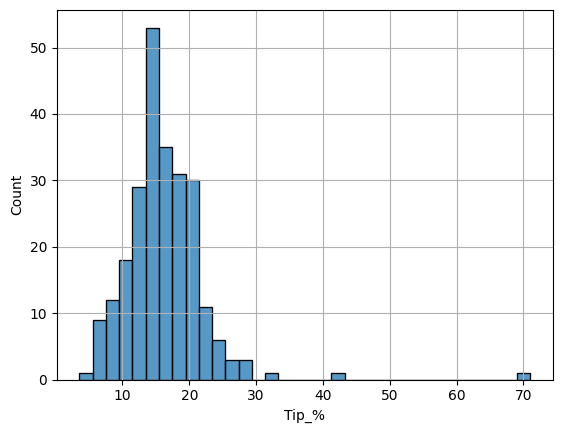

In [212]:
sns.histplot(df['Tip_%'])
plt.grid()
plt.show()

In [208]:
df['Tip_%'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Tip_%,244.0,16.080258,6.10722,3.563814,12.912736,15.476977,19.147549,71.034483


In [213]:
df['Tip_%'].mode()

0    14.482259
1    15.384615
2    17.574692
Name: Tip_%, dtype: float64

In [219]:
df['Tip_%'].nunique()

241

## Grouping based on Day

In [236]:
df.groupby(['day','time'])['total_bill'].sum().sort_values(ascending=False), df[['day','time']].value_counts().sort_values(ascending=False)

(day   time  
 Sat   Dinner    1778.40
 Sun   Dinner    1627.16
 Thur  Lunch     1077.55
 Fri   Dinner     235.96
       Lunch       89.92
 Thur  Dinner      18.78
 Sat   Lunch        0.00
 Sun   Lunch        0.00
 Name: total_bill, dtype: float64,
 day   time  
 Sat   Dinner    87
 Sun   Dinner    76
 Thur  Lunch     61
 Fri   Dinner    12
       Lunch      7
 Thur  Dinner     1
 Name: count, dtype: int64)

In [230]:
1778.40/87, 1627.16/76, 1096.33/62, 325.88/19

(20.44137931034483, 21.41, 17.682741935483868, 17.15157894736842)

In [238]:
## People coming in on Saturdays and Sundays spend 20 to 21 on average
## People coming in on Thursdays and Fridays spend 17+ on an average
## Dinner only on Saturdays and Sundays
## Mostly Lunch on Thursdays and very less Dinner 
## Mostly dinner on Fridays and few Dinner

In [242]:
df.groupby('sex')['total_bill'].sum()

sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64

In [243]:
## Male spend more on total_bill

In [254]:
df['day'].unique()
df['time'].unique()
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [264]:
df.loc[(df['day']=='Fri') & (df['time']=='Dinner')].sort_values(by=['total_bill'])

,day,time,size,sex,smoker,total_bill,tip,tot_bill_grp,Tip_%
92,Fri,Dinner,2,Female,Yes,5.75,1.00,0 to 9,17.391304
100,Fri,Dinner,2,Female,Yes,11.35,2.50,10 to 19,22.026432
97,Fri,Dinner,2,Male,Yes,12.03,1.50,10 to 19,12.468828
99,Fri,Dinner,2,Male,No,12.46,1.50,10 to 19,12.038523
101,Fri,Dinner,2,Female,Yes,15.38,3.00,10 to 19,19.505852
93,Fri,Dinner,2,Female,Yes,16.32,4.30,10 to 19,26.348039
98,Fri,Dinner,2,Male,Yes,21.01,3.00,20 to 29,14.278915
91,Fri,Dinner,2,Male,No,22.49,3.50,20 to 29,15.562472
94,Fri,Dinner,2,Female,No,22.75,3.25,20 to 29,14.285714
96,Fri,Dinner,2,Male,Yes,27.28,4.00,20 to 29,14.662757


### Grouping based on Tip_%

In [274]:
df.groupby('sex')['Tip_%'].mean()

sex
Male      15.765055
Female    16.649074
Name: Tip_%, dtype: float64

In [281]:
## Females tip slightly more on an average

In [282]:
df.groupby('smoker')['Tip_%'].mean()

smoker
Yes    16.319604
No     15.932846
Name: Tip_%, dtype: float64

In [283]:
## Smokers tip slightly more

In [286]:
df.groupby('day')['Tip_%'].mean().sort_values()

day
Sat     15.315172
Thur    16.127563
Sun     16.689729
Fri     16.991303
Name: Tip_%, dtype: float64

In [287]:
## most tips on fridays and Sundays

In [285]:
df.groupby('time')['Tip_%'].mean()

time
Lunch     16.412793
Dinner    15.951779
Name: Tip_%, dtype: float64

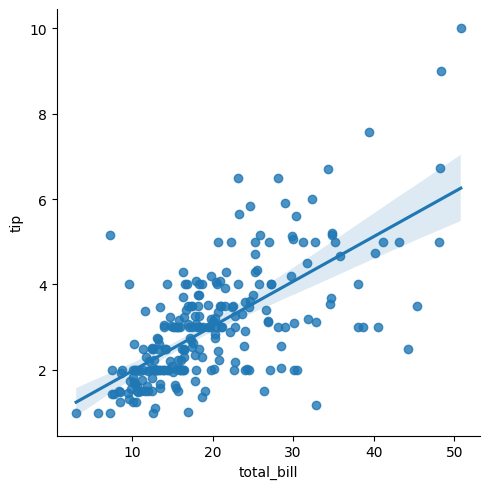

In [280]:
sns.lmplot(x='total_bill', y='tip', data=df)

### Tips increases as the total_bill increases

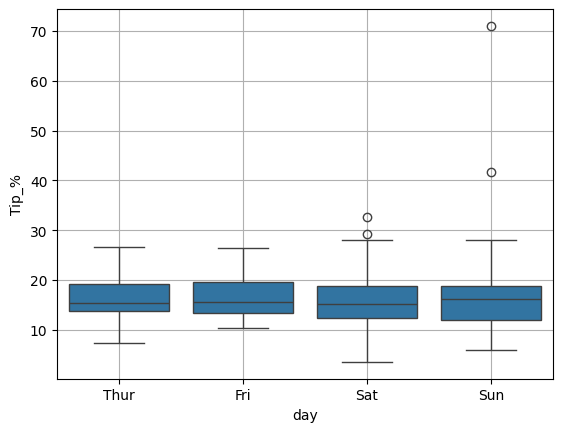

In [323]:
sns.boxplot(x='day', y='Tip_%', data=df)
plt.grid()
plt.show()

In [295]:
## More tips on saturdays and sundays

<Axes: xlabel='sex', ylabel='Tip_%'>

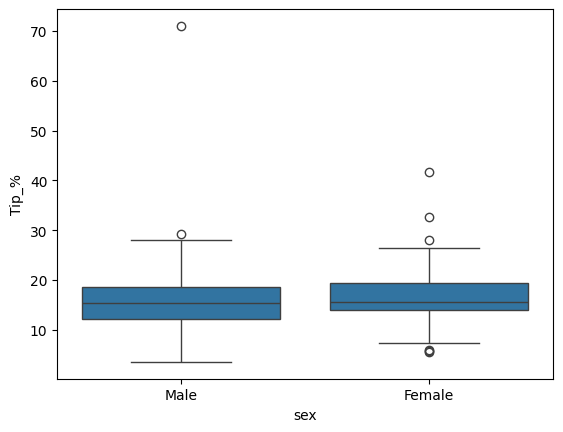

In [291]:
sns.boxplot(x='sex', y='Tip_%', data=df)

In [294]:
## almost equal

<Axes: xlabel='smoker', ylabel='Tip_%'>

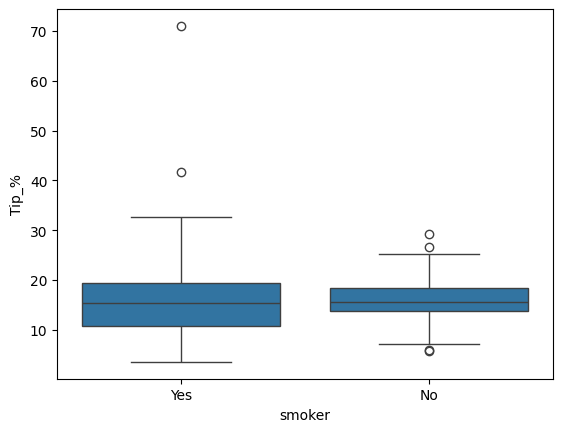

In [292]:
sns.boxplot(x='smoker', y='Tip_%', data=df)

In [293]:
## Smokers tip more 

In [300]:
## Questions

# 1. Which day gives the highest tip %?
# 2. Which gender tips better during dinner?

In [321]:
df.groupby('day')['Tip_%'].mean()

day
Thur    16.127563
Fri     16.991303
Sat     15.315172
Sun     16.689729
Name: Tip_%, dtype: float64

In [304]:
## Sunday has the highest tip% with 71%

In [319]:
df.where(df['time']=='Dinner').groupby('sex')['tip'].mean()

sex
Male      3.144839
Female    3.002115
Name: tip, dtype: float64

In [322]:
## Males tip slightly better during dinner

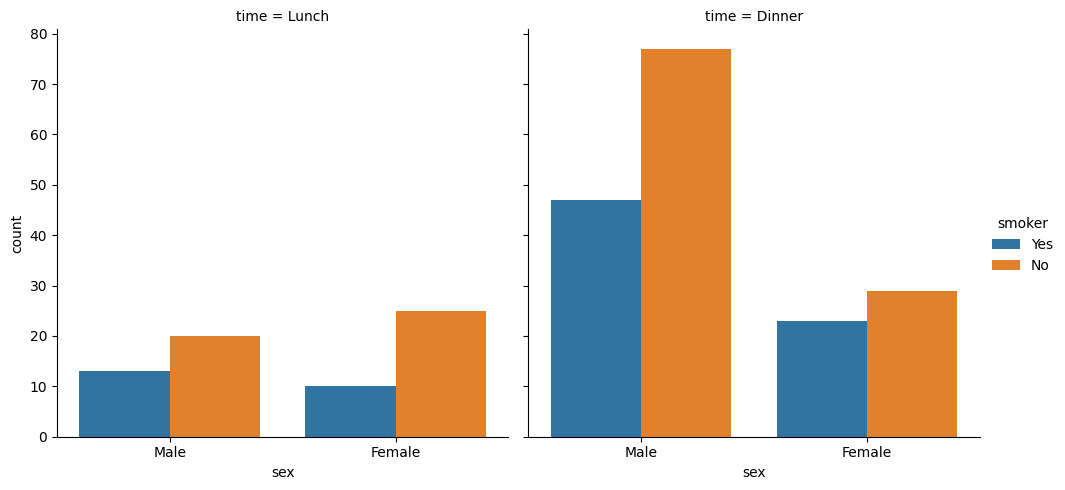

In [299]:
sns.catplot(
    x='sex', 
    hue='smoker', 
    col='time',
    kind='count',
    data=df
)

In [202]:
df.head()

,day,time,size,sex,smoker,total_bill,tip,tot_bill_grp,Tip_%
0,Sun,Dinner,2,Female,No,16.99,1.01,10 to 19,5.944673
1,Sun,Dinner,3,Male,No,10.34,1.66,10 to 19,16.054159
2,Sun,Dinner,3,Male,No,21.01,3.50,20 to 29,16.658734
3,Sun,Dinner,2,Male,No,23.68,3.31,20 to 29,13.978041
4,Sun,Dinner,4,Female,No,24.59,3.61,20 to 29,14.680765


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   day           244 non-null    category
 1   time          244 non-null    category
 2   size          244 non-null    int64   
 3   sex           244 non-null    category
 4   smoker        244 non-null    category
 5   total_bill    244 non-null    float64 
 6   tip           244 non-null    float64 
 7   tot_bill_grp  244 non-null    object  
 8   Tip_%         244 non-null    float64 
dtypes: category(4), float64(3), int64(1), object(1)
memory usage: 11.2+ KB
